In [23]:
# imports and setting main dir
from __future__ import division
import glob as glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import csv
plt.rcParams['figure.figsize'] = [10, 10]
main_dir = '/Users/andreas/Desktop/mura/MURA-v1.1/'

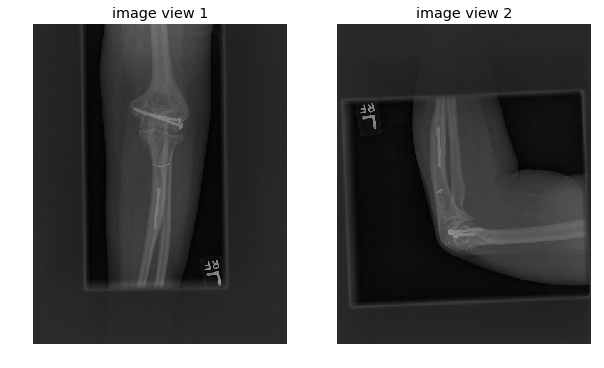

In [24]:
# plotting multi view positive or abnormal sample 

study_dir = os.path.join(main_dir,'train/XR_ELBOW/patient04904/study1_positive/')
img1 = cv2.imread((os.path.join(study_dir,'image1.png')), 1)
img2 = cv2.imread((os.path.join(study_dir,'image2.png')), 1)

plt.subplot(121)
plt.title('image view 1')
plt.imshow(img1)
plt.axis('off')

plt.subplot(122)
plt.title('image view 2')
plt.imshow(img2)
plt.axis('off')


plt.show()

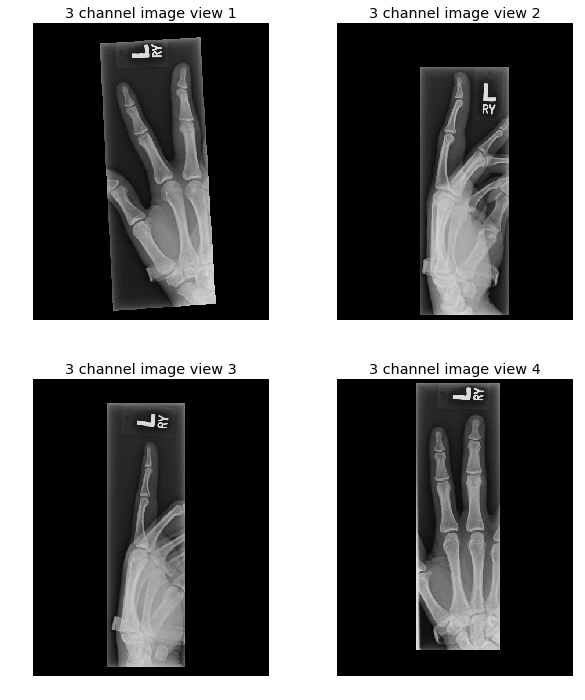

In [25]:
# plotting multi view negative or normal sample 

plt.rcParams['figure.figsize'] = [10, 12]
study_dir = os.path.join(main_dir,'train/XR_FINGER/patient04430/study1_negative/')

img1 = cv2.imread((os.path.join(study_dir,'image1.png')), 1)
img2 = cv2.imread((os.path.join(study_dir,'image2.png')), 1)
img3 = cv2.imread((os.path.join(study_dir,'image3.png')), 1)
img4 = cv2.imread((os.path.join(study_dir,'image4.png')), 1)

plt.subplot(221)
plt.title('image view 1')
plt.imshow(img1)
plt.axis('off')

plt.subplot(222)
plt.title('image view 2')
plt.imshow(img2)
plt.axis('off')

plt.subplot(223)
plt.title('image view 3')
plt.imshow(img3)
plt.axis('off')

plt.subplot(224)
plt.title('image view 4')
plt.imshow(img4)
plt.axis('off')

plt.show()


Total number of Train images 36808
Positive or Abnormal Class Percent: 0.404069767442



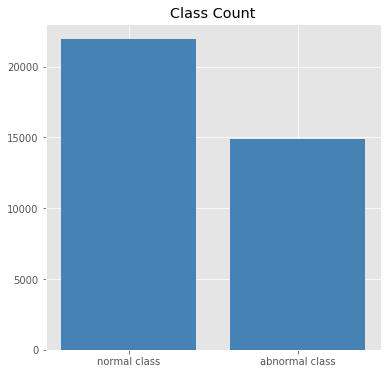

In [28]:
# plotting class distribution bar chart
import glob as glob
plt.rcParams['figure.figsize'] = [6, 6]
class_label_csv_dir = os.path.join(main_dir,'train_labeled_studies.csv')
plt.style.use('ggplot')
classes = []

with open(class_label_csv_dir , 'rb') as f:
    
    class_count = {0:0, 1:0}
    reader = csv.reader(f)
    for row in reader:
        study_label = int(row[1])
        
        file_path = os.path.join('/Users/andreas/Desktop/mura/',row[0])
        patient_files = glob.glob(file_path + '/*.png')
        
        class_count[study_label] += len(patient_files)

    class_count_arr = class_count.values()
    
    print "Total number of Train images {}".format(sum(class_count_arr))
    print "{0}: {1}".format("Positive or Abnormal Class Percent" ,class_count_arr[1]/sum(class_count_arr))
    print
    x = [0, 1]
    plt.title('Class Count')
    plt.bar(x, class_count_arr, color='steelblue')
    plt.xticks(x, ('normal class', 'abnormal class'))  
    plt.show()
    

Class Percents for Positive or Abnormal Class By Bone Type:
XR_WRIST: 0.408839212469
XR_SHOULDER: 0.497434061344
XR_HUMERUS: 0.470911949686
XR_HAND: 0.267725058633
XR_FOREARM: 0.362191780822
XR_ELBOW: 0.406814033665
XR_FINGER: 0.385428907168


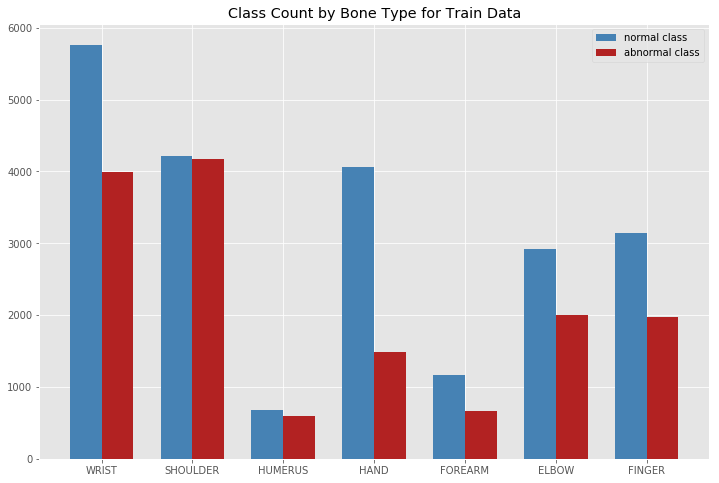

In [27]:
# plotting class distribution bar chart by bone type

plt.rcParams['figure.figsize'] = [12, 8]
class_label_csv_dir = os.path.join(main_dir,'train_labeled_studies.csv')
plt.style.use('ggplot')
classes = []
with open(class_label_csv_dir , 'rb') as f:

    bone_dic = {}
    reader = csv.reader(f)

    for row in reader:
        bone_type = row[0].split('/')[2]
        study_label = int(row[1])

        if bone_type not in bone_dic:
            bone_dic[bone_type] = [0,0]
            
        file_path = os.path.join('/Users/andreas/Desktop/mura/', row[0])
        patient_files = glob.glob(file_path + '/*.png')

        bone_dic[bone_type][study_label] += len(patient_files)
            

N = 7
negative_class = [v[0] for v in bone_dic.values()]
positive_class = [v[1] for v in bone_dic.values()]

class_percents = [v[1]/(v[0] + v[1]) for v in bone_dic.values()]
print "Class Percents for Positive or Abnormal Class By Bone Type:"
for n, p in zip(bone_dic.keys(), class_percents):
    print "{0}: {1}".format(n, p)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, negative_class, width, label='normal class', color='steelblue')
plt.bar(ind + width, positive_class, width, label='abnormal class', color='firebrick')

plt.title('Class Count by Bone Type for Train Data')

labels = [l[3:] for l in bone_dic.keys()] #removing XR_ from labels
plt.xticks(ind + width / 2, labels)
plt.legend(loc='best')
plt.show()